In [1]:
import tensorflow as tf

In [4]:
hello = tf.constant('Hello World')

In [5]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [6]:
x = tf.constant(100)

In [7]:
type(x)

tensorflow.python.framework.ops.Tensor

In [8]:
x

<tf.Tensor 'Const_3:0' shape=() dtype=int32>

In [9]:
sess = tf.Session()

In [10]:
sess.run(hello)

b'Hello World'

In [11]:
sess.run(x)

100

In [12]:
type(sess.run(x))

numpy.int32

In [13]:
type(sess.run(hello))

bytes

In [14]:
x = tf.constant(2)

In [15]:
y = tf.constant(3)

In [18]:
with tf.Session() as sess:
    print('Operations with constants')
    print('Addition: ', sess.run(x+y))
    print('Subtraction: ', sess.run(x-y))
    print('Multiplication: ',sess.run(x*y))
    print('Division: ',sess.run(x/y))

Operations with constants
Addition:  5
Subtraction:  -1
Multiplication:  6
Division:  0.6666666666666666


In [19]:
x = tf.placeholder(tf.int32)

In [20]:
y = tf.placeholder(tf.int32)

In [21]:
x

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=int32>

In [27]:
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)
d = {x:20,y:30}

In [29]:
with tf.Session() as sess:
    print('Operations with Placeholders')
    print('Addition: ',sess.run(add,feed_dict=d))
    print('Subtraction: ',sess.run(sub,feed_dict=d))
    print('Multiplication: ',sess.run(mul,feed_dict=d))

Operations with Placeholders
Addition:  50
Subtraction:  -10
Multiplication:  600


In [30]:
import numpy as np

In [31]:
a = np.array([[5.0,5.0]])
b = np.array([[2.0],[2.0]])

In [32]:
a.shape

(1, 2)

In [33]:
b.shape

(2, 1)

In [34]:
mat1 = tf.constant(a)

In [35]:
mat2 = tf.constant(b)

In [36]:
matrix_multi = tf.matmul(mat1,mat2)

In [37]:
with tf.Session() as sess:
    result = sess.run(matrix_multi)
    print(result)

[[20.]]


In [38]:
#MNIST DATA

In [39]:
from tensorflow.examples.tutorials.mnist import input_data

In [40]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [41]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [42]:
mnist.train.images.shape

(55000, 784)

In [43]:
mnist.train.num_examples

55000

In [45]:
mnist.test.num_examples

10000

In [46]:
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

In [48]:
mnist.train.images[1].shape

(784,)

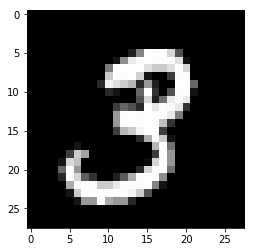

In [51]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

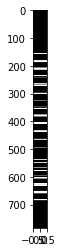

In [52]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

In [59]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [60]:
W = tf.Variable(tf.zeros(shape=[784,10]))

In [61]:
b = tf.Variable(tf.zeros(shape=[10]))

In [62]:
y = tf.matmul(x,W) + b

In [63]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [66]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [67]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [68]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [69]:
train = optimizer.minimize(cross_entropy)

In [70]:
init = tf.global_variables_initializer()

In [72]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x,batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9182


In [73]:
import pandas as pd

In [74]:
df = pd.read_csv('iris.csv')

In [75]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [76]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [77]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']

In [78]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [79]:
df['target'] = df['target'].apply(int)

In [80]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [81]:
y = df['target']

In [82]:
X = df.drop('target',axis=1)

In [83]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [84]:
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [88]:
# Feature columns

In [89]:
feat_cols = []
for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [90]:
feat_cols

[_NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [91]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=5,shuffle=True)

In [92]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10],n_classes=3,feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/kr/zycz5xvd6956lgtp1417hsj80000gn/T/tmp9l5g2hpp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c2eddcdd8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [93]:
classifier.train(input_fn=input_func,steps=50)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/kr/zycz5xvd6956lgtp1417hsj80000gn/T/tmp9l5g2hpp/model.ckpt.
INFO:tensorflow:loss = 12.086297, step = 1
INFO:tensorflow:Saving checkpoints for 50 into /var/folders/kr/zycz5xvd6956lgtp1417hsj80000gn/T/tmp9l5g2hpp/model.ckpt.
INFO:tensorflow:Loss for final step: 1.6980598.


In [94]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [95]:
predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/kr/zycz5xvd6956lgtp1417hsj80000gn/T/tmp9l5g2hpp/model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [97]:
predictions

[{'logits': array([-1.16413  ,  2.2613914,  0.853314 ], dtype=float32),
  'probabilities': array([0.02547268, 0.78299624, 0.19153115], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.03510795,  2.489533  , -0.00836843], dtype=float32),
  'probabilities': array([0.06890132, 0.86033016, 0.07076856], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-2.3222702,  2.6554537,  1.7410593], dtype=float32),
  'probabilities': array([0.00489449, 0.71040434, 0.28470114], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([ 3.577374 , -0.3071261, -2.405852 ], dtype=float32),
  'probabilities': array([0.9774418 , 0.02009435, 0.00246382], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.850153 ,  2.7785928,  1.4244576], dtype=float32),
  'probabilities': array([0.00770306, 0.7

In [98]:
final_preds = []

In [100]:
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

In [102]:
print(confusion_matrix(y_test,final_preds))

[[11  0  0]
 [ 0 17  0]
 [ 0 11  6]]


In [103]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.61      1.00      0.76        17
           2       1.00      0.35      0.52        17

   micro avg       0.76      0.76      0.76        45
   macro avg       0.87      0.78      0.76        45
weighted avg       0.85      0.76      0.73        45

